<a href="https://colab.research.google.com/github/ryosanada/kuzushiji_1/blob/main/notebook/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!pip install --target /content/drive/MyDrive/Colab\ Notebooks/module/ cPickle

ERROR: Could not find a version that satisfies the requirement cPickle (from versions: none)
ERROR: No matching distribution found for cPickle


In [10]:
import numpy as np
import io
from PIL import Image
import zipfile
import matplotlib.pyplot as plt
from tqdm import tqdm
import joblib
from pathlib import Path
import warnings
warnings.filterwarnings(action="ignore")

In [12]:
# path
path_train_1 = '/content/drive/MyDrive/Colab Notebooks/SIGNATE/くずし字認識チャレンジ①/data/train_1.zip'
path_train_2 = '/content/drive/MyDrive/Colab Notebooks/SIGNATE/くずし字認識チャレンジ①/data/train_2.zip'
path_train_3 = '/content/drive/MyDrive/Colab Notebooks/SIGNATE/くずし字認識チャレンジ①/data/train_3.zip'
path_train_4 = '/content/drive/MyDrive/Colab Notebooks/SIGNATE/くずし字認識チャレンジ①/data/train_4.zip'
path_obj_dir = '/content/drive/MyDrive/Colab Notebooks/SIGNATE/くずし字認識チャレンジ①/notebook/obj'
path_obj_train_1 = f'{path_obj_dir}/train_1.bz2'
path_obj_train_2 = f'{path_obj_dir}/train_2.bz2'
path_obj_train_3 = f'{path_obj_dir}/train_3.bz2'
path_obj_train_4 = f'{path_obj_dir}/train_4.bz2'


In [13]:
from pathlib import Path
for path in [path_obj_train_1, path_obj_train_2, path_obj_train_3, path_obj_train_4]:
    myfile = Path(path)
    myfile.touch(exist_ok=True)

In [14]:
class train_data_load:
    def __init__(self, path):
        self.img_data, self.annot_data, self.filename_list = self.import_from_zip(path)

    def import_from_zip(self, zip_path):
        print('import from : ', zip_path)
        # 配列格納用のList
        img_data = []
        img_filename = []
        annot_data = []
        annot_filename = []

        # zipの読み込み
        with zipfile.ZipFile(zip_path, 'r') as zip_file:
            # zipファイル内の各ファイルについてループ
            for info in tqdm(zip_file.infolist()):
                # 画像ファイルの場合
                if info.filename.endswith('.jpg'):
                    img_filename.append(info.filename[:-4])
                    # 対象の画像ファイルを開く
                    with zip_file.open(info.filename) as img_file:
                        # 画像のバイナリデータを読み込む
                        img_bin = io.BytesIO(img_file.read())
                        # バイナリデータをpillowから開く
                        img = Image.open(img_bin)
                        # 画像データを配列化
                        img_array = np.array(img)
                        # 格納用のListに追加
                        img_data.append(img_array)

                # アノテーションファイルの場合
                if info.filename.endswith('.tsv'):
                    annot_filename.append(info.filename[:-4])
                    # 対象の画像ファイルを開く
                    with zip_file.open(info.filename) as annot_file:
                        annot = np.loadtxt(annot_file, delimiter="\t")
                        if np.ndim(annot) == 1:
                            annot = annot[np.newaxis]
                        elif np.ndim(annot) != 2:
                            raise Exception(f"""
                            アノテーションファイルに不備があります。
                            filename : {info.filename}
                            """)
                        annot_data.append(annot)

        # filenameが順番通りか確認
        if img_filename != annot_filename:
            raise Exception("filenameが順番通りじゃない")

    	# 処理が完了後、np.arrayに変換
        return np.array(img_data), np.array(annot_data), np.array(img_filename)

    def plot(self, slice=None, size=5):
        if slice == None:
            s0, s1 = 0, self.img_data.shape[0]
        else:
            s0, s1 = slice[0], slice[1]
        len = s1 - s0
        images = self.img_data[s0:s1]
        annots = self.annot_data[s0:s1]
        filenames = self.filename_list[s0:s1]

        row = (np.ceil(len / 5)).astype(int)
        col = (np.min([len, 5])).astype(int)
        fig, axes = plt.subplots(row, col, figsize=(size * col, size * row))

        for i in tqdm(range(len)):
            ax = axes.ravel()[i]
            ax.set_title(filenames[i])
            ax.imshow(images[i])
            for x1, y1, x2, y2, x3, y3, x4, y4 in annots[i]:
                ax.plot([x1, x2], [y1, y2], color="red")
                ax.plot([x2, x3], [y2, y3], color="red")
                ax.plot([x3, x4], [y3, y4], color="red")
                ax.plot([x4, x1], [y4, y1], color="red")

            ax.axis('off')
        plt.show()



In [15]:
# train_1 = train_data_load(path_train_1)
# train_2 = train_data_load(path_train_2)
# train_3 = train_data_load(path_train_3)
train_4 = train_data_load(path_train_4)

import from :  /content/drive/MyDrive/Colab Notebooks/SIGNATE/くずし字認識チャレンジ①/data/train_4.zip


100%|██████████| 90/90 [00:06<00:00, 14.89it/s]


In [18]:
# with open(path_pickle_train_1, 'wb') as p:
#     pickle.dump(train_1, p)

# with open(path_pickle_train_2, 'wb') as p:
#     pickle.dump(train_2, p)

# with open(path_pickle_train_3, 'wb') as p:
#     pickle.dump(train_3, p)
    
with open(path_obj_train_4, 'wb') as p:
    joblib.dump(train_4, p, compress=3)


100%|██████████| 2/2 [00:00<00:00,  9.61it/s]


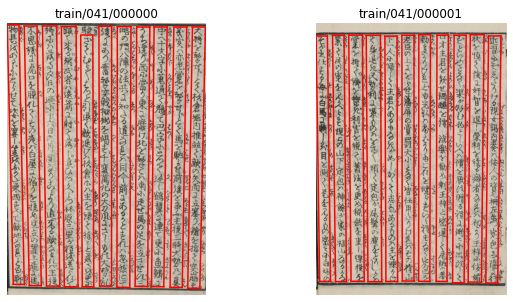

In [106]:
train_4.plot((0,2))